In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1577836800&interval=1d&events=history'

## Reading and dispalying the csv file
file_1 = pd.read_csv (url, index_col = 'Date')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
file_1 = file_1[[ 'Close']]

In [3]:
## MACD and signal line(9 day EMA of MACD line)

file_1['MACD'] = (file_1['Close'].ewm(span=12).mean())-(file_1['Close'].ewm(span=26).mean())
file_1['signal line'] = file_1['MACD'].ewm(span=9).mean()

Text(0.5, 1.0, 'MACD vs signal line ')

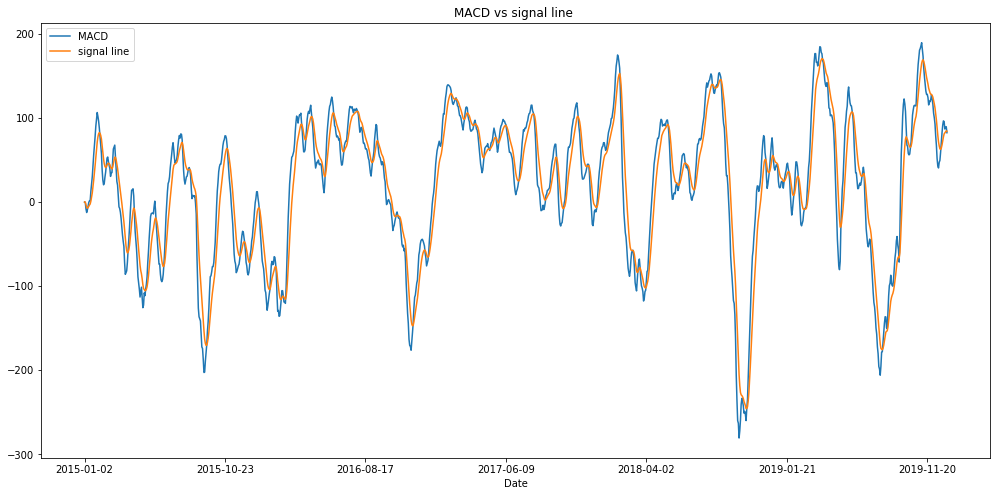

In [4]:
#plotting MACD and signal line
file_1['MACD'].plot(figsize=(17,8), legend = True)
file_1['signal line'].plot(figsize=(17,8), legend = True)
plt.title('MACD vs signal line ')

In [5]:
# signal 1 or -1 and 0
file_1['diff'] = file_1['MACD'] - file_1['signal line']
file_1['Indicator'] = ((file_1['diff'] > 0) & (file_1['diff'].shift(1) < 0))
file_1['temp_Indicator'] = ((file_1['diff'] < 0) & (file_1['diff'].shift(1) > 0))*-1
file_1['Indicator']=file_1['Indicator']+file_1['temp_Indicator']
file_1['Indicator'] = file_1['Indicator'].astype(int)

In [6]:
# Dates where POSITIVE cross-over is happening
file_1[file_1['Indicator'] == -1].index

Index(['2015-02-04', '2015-02-24', '2015-03-09', '2015-04-20', '2015-06-03',
       '2015-07-27', '2015-08-10', '2015-10-29', '2015-12-07', '2016-01-06',
       '2016-02-10', '2016-02-25', '2016-04-06', '2016-04-29', '2016-06-13',
       '2016-08-01', '2016-09-14', '2016-10-26', '2016-12-22', '2017-02-15',
       '2017-02-27', '2017-03-22', '2017-04-07', '2017-05-09', '2017-05-22',
       '2017-06-12', '2017-08-07', '2017-09-25', '2017-11-08', '2017-11-30',
       '2018-02-02', '2018-03-05', '2018-03-19', '2018-05-16', '2018-06-20',
       '2018-08-14', '2018-09-03', '2018-12-10', '2018-12-24', '2019-01-24',
       '2019-02-14', '2019-04-08', '2019-06-13', '2019-07-08', '2019-09-19',
       '2019-10-07', '2019-11-13', '2019-12-31'],
      dtype='object', name='Date')

In [7]:
# Dates where NEGATIVE cross-over is happening
file_1[file_1['Indicator'] == 1].index

Index(['2015-01-09', '2015-02-18', '2015-03-02', '2015-04-06', '2015-05-13',
       '2015-06-18', '2015-08-06', '2015-09-11', '2015-11-27', '2015-12-17',
       '2016-01-28', '2016-02-22', '2016-03-01', '2016-04-13', '2016-05-26',
       '2016-07-04', '2016-08-31', '2016-10-24', '2016-11-29', '2016-12-29',
       '2017-02-22', '2017-03-15', '2017-04-05', '2017-04-26', '2017-05-10',
       '2017-05-26', '2017-07-07', '2017-09-01', '2017-10-10', '2017-11-27',
       '2017-12-15', '2018-02-28', '2018-03-13', '2018-04-02', '2018-06-07',
       '2018-07-09', '2018-08-21', '2018-10-29', '2018-12-14', '2019-01-16',
       '2019-02-04', '2019-02-26', '2019-05-20', '2019-07-03', '2019-08-14',
       '2019-09-20', '2019-10-16', '2019-12-18'],
      dtype='object', name='Date')

In [8]:
#mean absolute return rot the next 10 days
file_1['Mean_Return_NXT_10D']=abs(file_1['Close'].rolling(10).mean().shift(-10)/file_1['Close']-1)
file_1=file_1[['Close','Mean_Return_NXT_10D','Indicator']]


In [10]:
#final df
file_1=file_1.dropna()
file_1

,Close,Mean_Return_NXT_10D,Indicator
Date,,,
2015-01-02,8395.450195,0.010954,0
2015-01-05,8378.400391,0.006885,0
2015-01-06,8127.350098,0.030784,0
2015-01-07,8102.100098,0.041740,0
2015-01-08,8234.599609,0.031375,0
2015-01-09,8284.500000,0.031815,1
2015-01-12,8323.000000,0.034101,0
2015-01-13,8299.400391,0.044450,0
2015-01-14,8277.549805,0.055359,0
